In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore,chi2_contingency,chi2
import plotly.express as px
from scipy.stats import norm

import warnings
warnings.filterwarnings('ignore')

# Exploratory Data Analysis and Cleaning

In [98]:
#Loading data with Pandas
coco_df = pd.read_csv('/content/data.csv')
coco_df.head()

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
0,1,U.S.A.,Tanzania,76.0,3.25,No,No,Yes,No,No,...,Yes,No,Yes,Yes,Yes,Yes,No,No,No,3.0
1,2,U.S.A.,Dominican Republic,76.0,3.50,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
2,3,U.S.A.,Madagascar,76.0,3.75,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
3,4,U.S.A.,Other,68.0,3.00,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0
4,5,U.S.A.,Other,80.0,3.25,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,3.0


In [99]:
#the structure of the dataframe
coco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2130 entries, 0 to 2129
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2130 non-null   int64  
 1   company_location         2130 non-null   object 
 2   country_of_bean_origin   2130 non-null   object 
 3   cocoa_percent            2130 non-null   float64
 4   rating                   2130 non-null   float64
 5   sweet                    2130 non-null   object 
 6   nutty                    2130 non-null   object 
 7   cocoa                    2130 non-null   object 
 8   roasty                   2130 non-null   object 
 9   earthy                   2130 non-null   object 
 10  creamy                   2130 non-null   object 
 11  sandy                    2130 non-null   object 
 12  fatty                    2130 non-null   object 
 13  floral                   2130 non-null   object 
 14  intense                 

In [100]:
#shapeof the dataframe
coco_df.shape

(2130, 33)

In [101]:
#Total Missing Values
coco_df.isnull().sum()    # most of the data is clean but there are 70 null values in "number_of_ingredients"      

id                          0
company_location            0
country_of_bean_origin      0
cocoa_percent               0
rating                      0
sweet                       0
nutty                       0
cocoa                       0
roasty                      0
earthy                      0
creamy                      0
sandy                       0
fatty                       0
floral                      0
intense                     0
spicy                       0
sour                        0
vanilla                     0
fruit                       0
molasses                    0
woody                       0
sticky                      0
coffee                      0
rich                        0
dried.fruit                 0
ingredient_Beans            0
ingredient_Sugar            0
ingredient_Sweetener        0
ingredient_Cocoa_Butter     0
ingredient_vanilla          0
ingredient_lecithin         0
ingredient_salt             0
number_of_ingredients      70
dtype: int

In [102]:
coco_df1 = coco_df.fillna(0)

In [16]:
coco_df1.isnull().sum() 

id                         0
company_location           0
country_of_bean_origin     0
cocoa_percent              0
rating                     0
sweet                      0
nutty                      0
cocoa                      0
roasty                     0
earthy                     0
creamy                     0
sandy                      0
fatty                      0
floral                     0
intense                    0
spicy                      0
sour                       0
vanilla                    0
fruit                      0
molasses                   0
woody                      0
sticky                     0
coffee                     0
rich                       0
dried.fruit                0
ingredient_Beans           0
ingredient_Sugar           0
ingredient_Sweetener       0
ingredient_Cocoa_Butter    0
ingredient_vanilla         0
ingredient_lecithin        0
ingredient_salt            0
number_of_ingredients      0
dtype: int64

In [83]:
coco_df1.dtypes

id                           int64
company_location            object
country_of_bean_origin      object
cocoa_percent              float64
rating                     float64
sweet                       object
nutty                       object
cocoa                       object
roasty                      object
earthy                      object
creamy                      object
sandy                       object
fatty                       object
floral                      object
intense                     object
spicy                       object
sour                        object
vanilla                     object
fruit                       object
molasses                    object
woody                       object
sticky                      object
coffee                      object
rich                        object
dried.fruit                 object
ingredient_Beans            object
ingredient_Sugar            object
ingredient_Sweetener        object
ingredient_Cocoa_But

In [103]:
coco_df1['number_of_ingredients'] = coco_df1['number_of_ingredients'].astype(int)

In [104]:
coco_df1['number_of_ingredients'] = coco_df1['number_of_ingredients'] + 1

In [105]:
coco_df1.head()

,id,company_location,country_of_bean_origin,cocoa_percent,rating,sweet,nutty,cocoa,roasty,earthy,...,rich,dried.fruit,ingredient_Beans,ingredient_Sugar,ingredient_Sweetener,ingredient_Cocoa_Butter,ingredient_vanilla,ingredient_lecithin,ingredient_salt,number_of_ingredients
0,1,U.S.A.,Tanzania,76.0,3.25,No,No,Yes,No,No,...,Yes,No,Yes,Yes,Yes,Yes,No,No,No,4
1,2,U.S.A.,Dominican Republic,76.0,3.50,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
2,3,U.S.A.,Madagascar,76.0,3.75,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
3,4,U.S.A.,Other,68.0,3.00,No,No,No,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4
4,5,U.S.A.,Other,80.0,3.25,No,No,Yes,No,No,...,No,No,Yes,Yes,Yes,Yes,No,No,No,4


In [106]:
def plot_bar_chart_with_percent_label(df, target_variable, if_sort=False, gap_label_bar=0, figsize=(9,6)):
    # prepare data
    plot_data = df[[target_variable]].value_counts().reset_index(name='count')
    plot_data['percent'] = plot_data['count']/plot_data['count'].sum()
    if if_sort:
        x_order = plot_data.sort_values(by=['percent'], ascending=False)[target_variable]
    else:
        x_order = plot_data.sort_values(by=[target_variable], ascending=True)[target_variable]
    # plot
    
    fig = plt.figure(figsize=figsize)
    ax = sns.barplot(data=plot_data, x=target_variable, y='percent', order=x_order)
    # add label
    for p in ax.patches:
        x = p.get_x() + p.get_width()
        y = p.get_height() + gap_label_bar
        plt.xticks(rotation = 90)
    ax.margins(y=0.1)

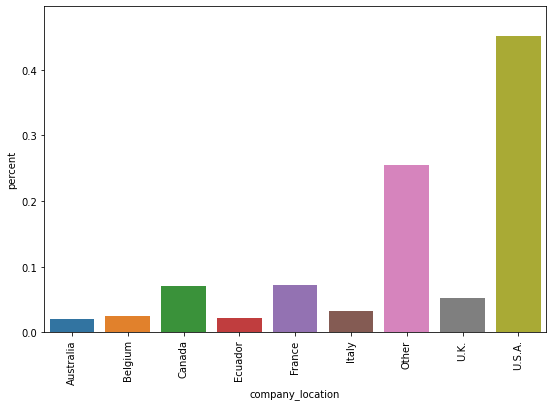

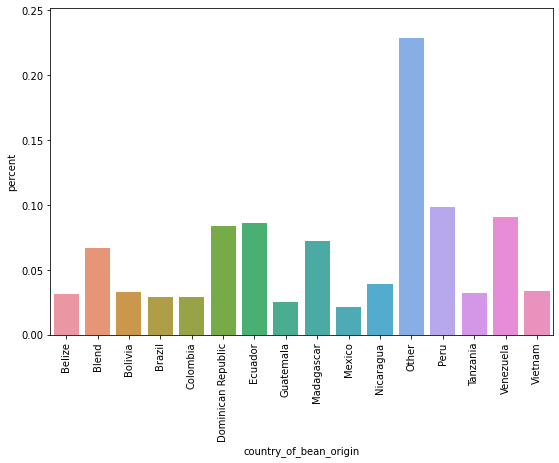

In [107]:
for attr in ['company_location',	'country_of_bean_origin']:
    plot_bar_chart_with_percent_label(df=coco_df1, target_variable=attr)

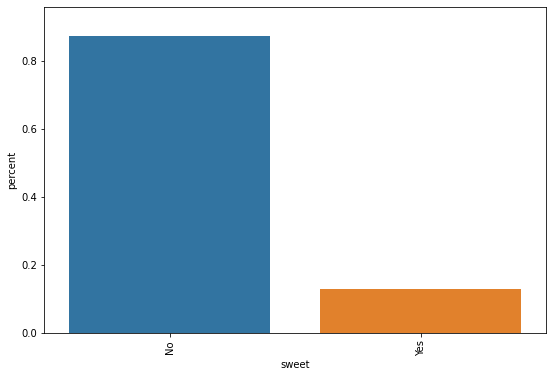

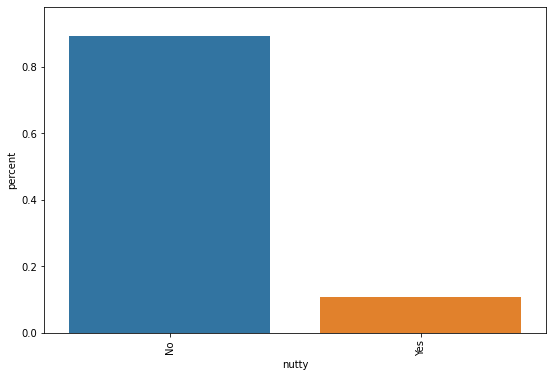

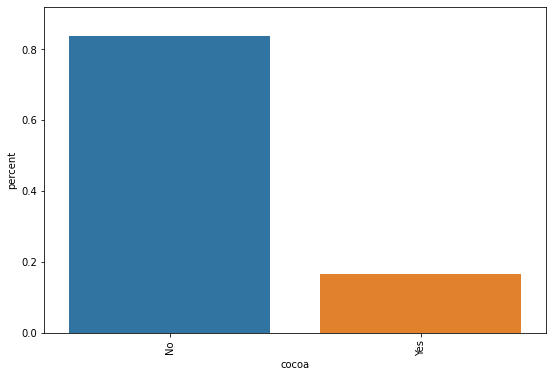

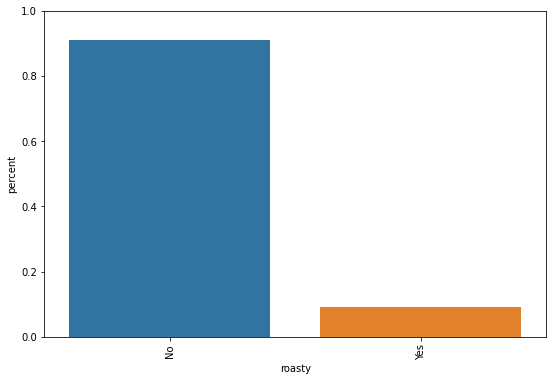

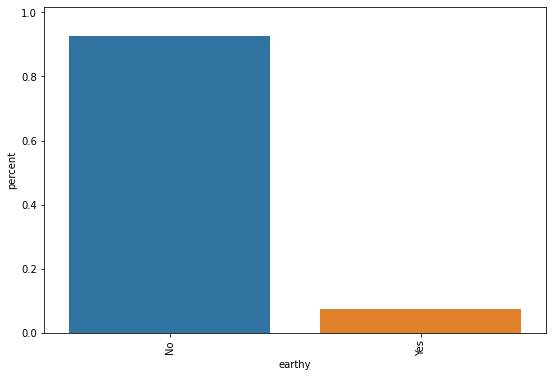

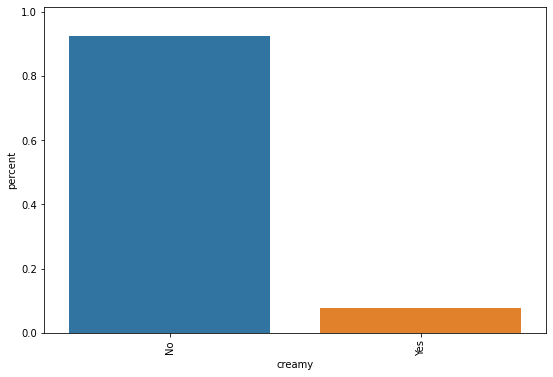

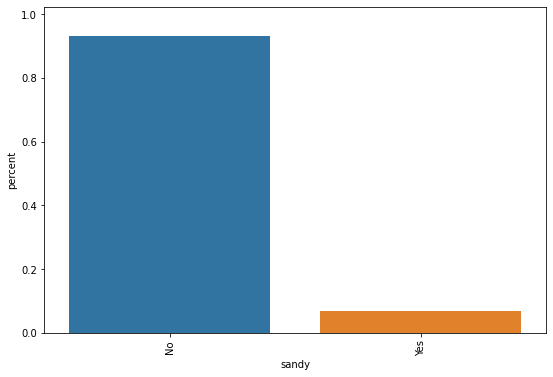

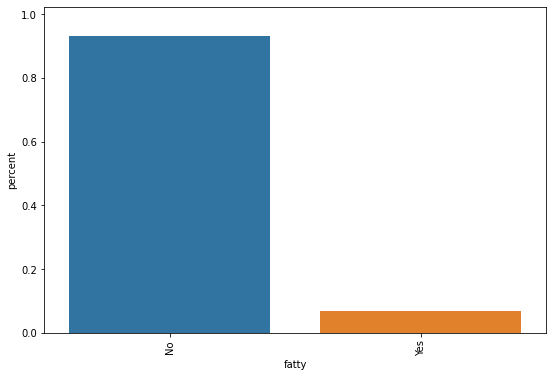

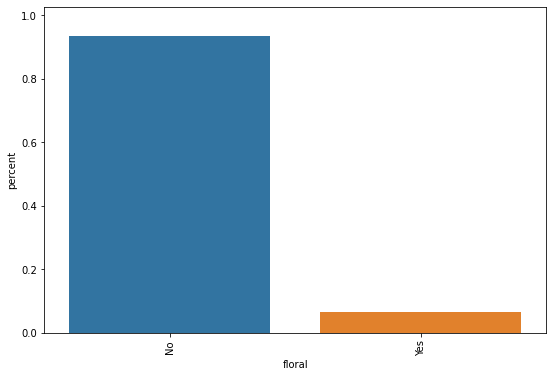

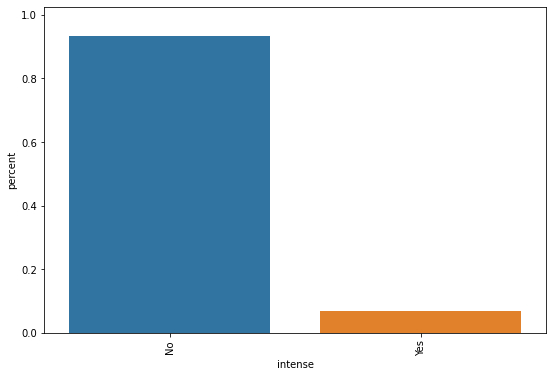

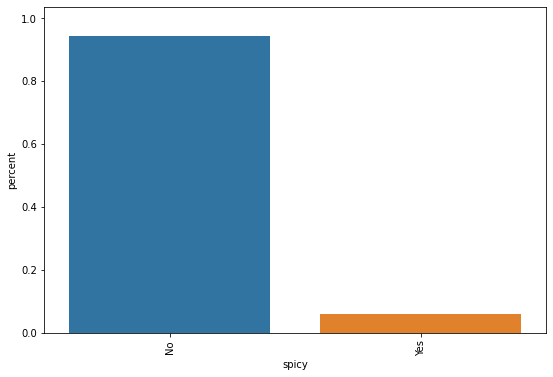

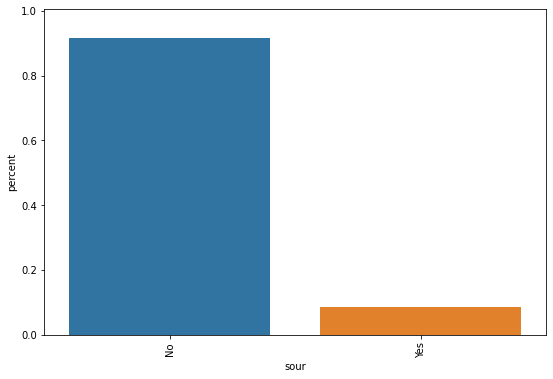

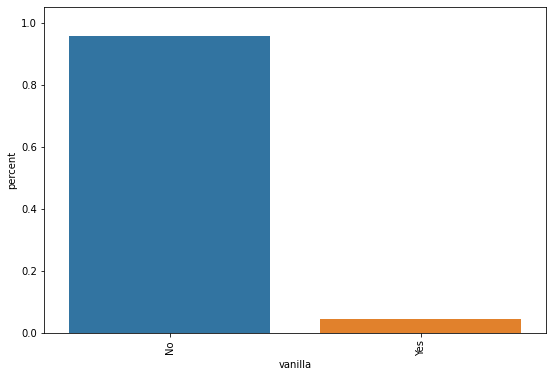

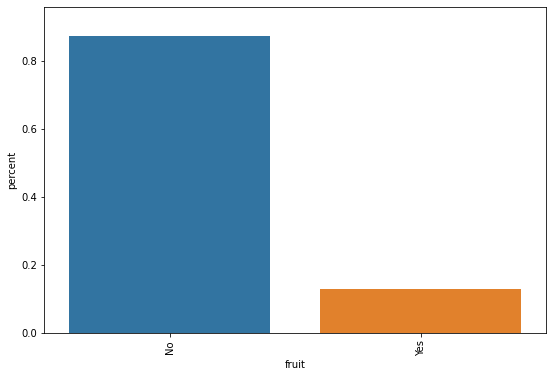

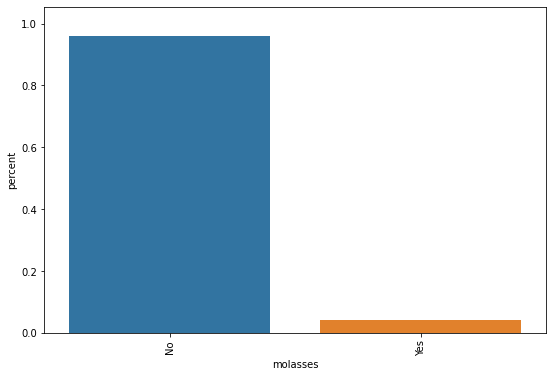

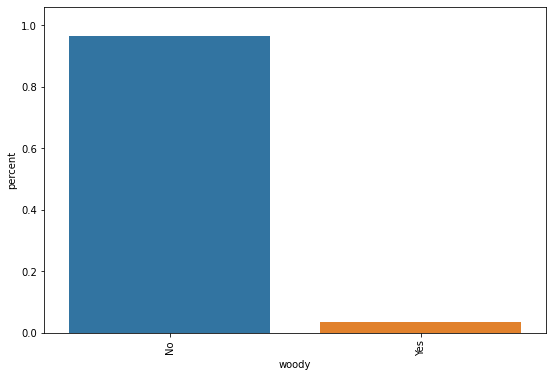

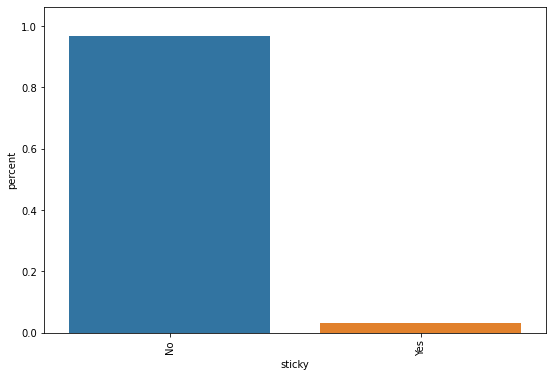

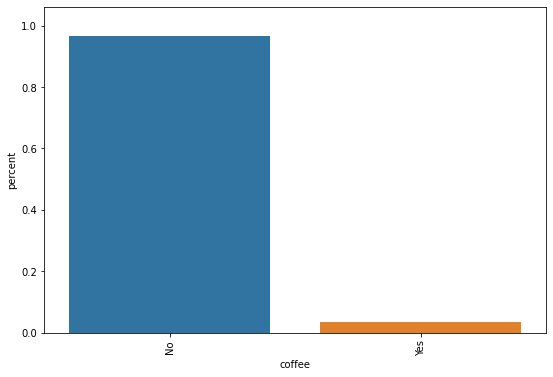

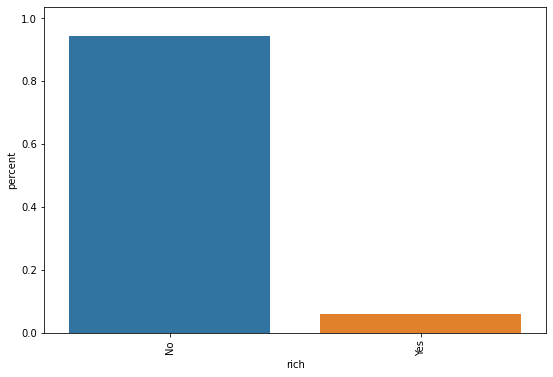

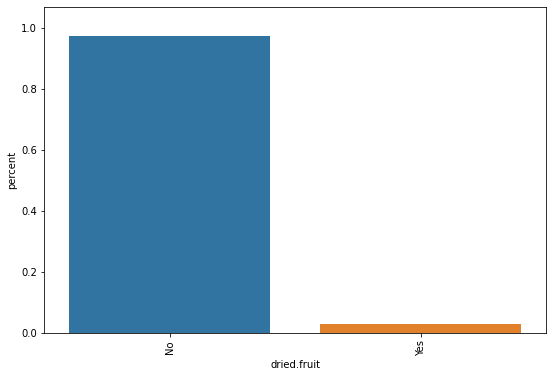

In [108]:
for attr in ['sweet','nutty','cocoa','roasty','earthy','creamy','sandy','fatty','floral','intense',
             'spicy','sour','vanilla','fruit','molasses','woody','sticky','coffee',
             'rich','dried.fruit']:
    plot_bar_chart_with_percent_label(df=coco_df1, target_variable=attr)

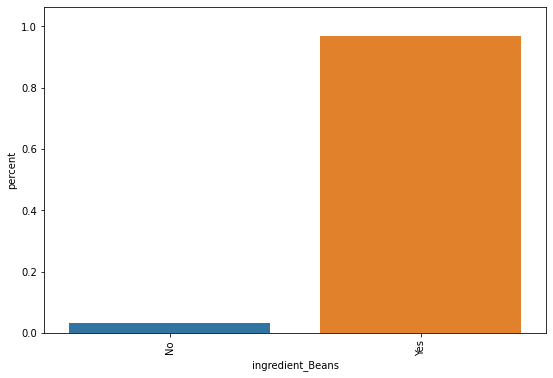

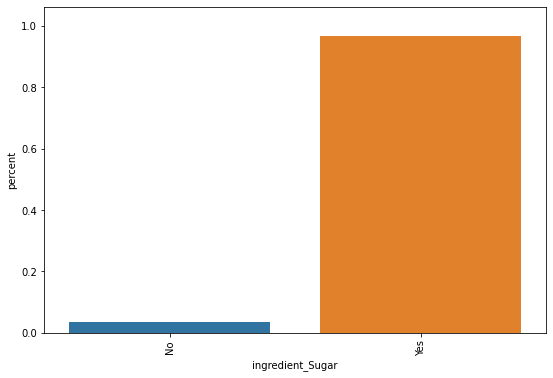

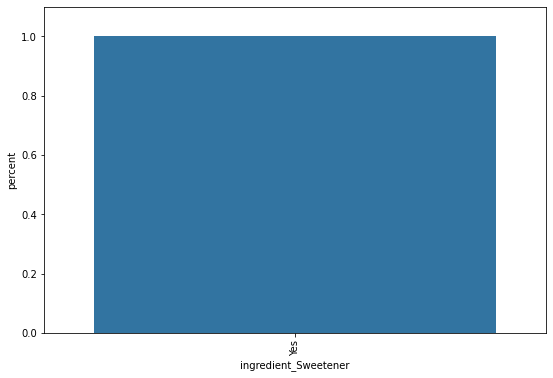

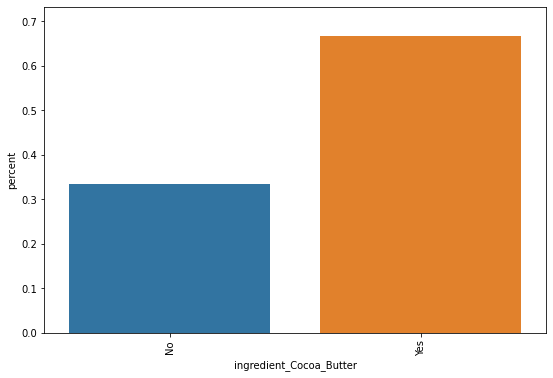

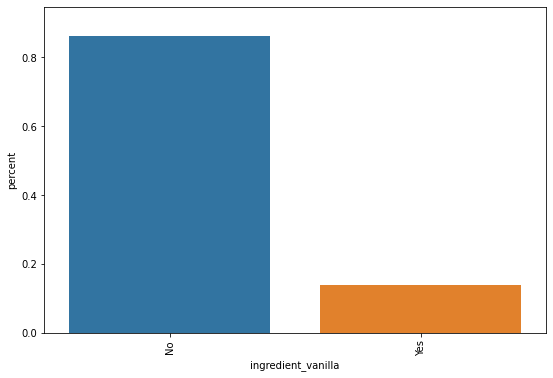

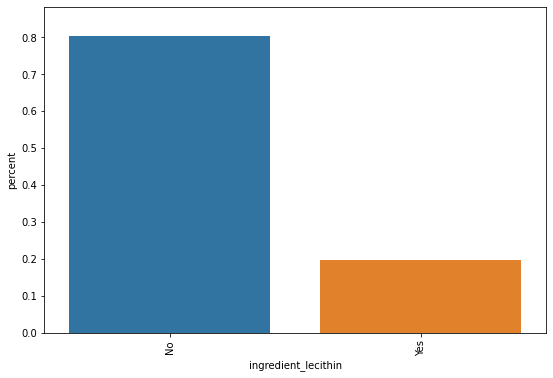

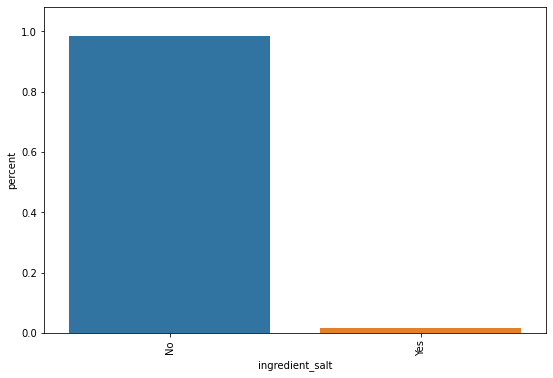

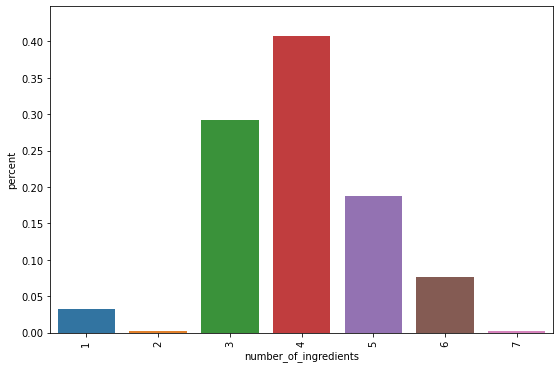

In [109]:
for attr in ['ingredient_Beans','ingredient_Sugar','ingredient_Sweetener',
             'ingredient_Cocoa_Butter','ingredient_vanilla',
             'ingredient_lecithin','ingredient_salt', 'number_of_ingredients']:
    plot_bar_chart_with_percent_label(df=coco_df1, target_variable=attr)

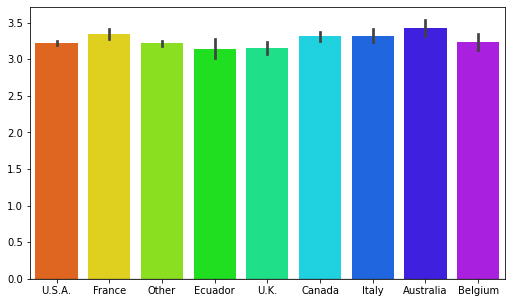

,count,mean,std,min,25%,50%,75%,max
company_location,,,,,,,,
Australia,40.0,3.425000,0.363389,2.5,3.25,3.500,3.75,4.0
Belgium,48.0,3.239583,0.378822,2.5,3.00,3.125,3.50,4.0
Canada,149.0,3.312081,0.391965,2.5,3.00,3.250,3.50,4.0
Ecuador,39.0,3.141026,0.428411,2.5,2.75,3.000,3.50,4.0
France,136.0,3.340074,0.409011,2.5,3.00,3.500,3.75,4.0
Italy,59.0,3.322034,0.380140,2.5,3.00,3.250,3.50,4.0
Other,512.0,3.222656,0.381808,2.5,3.00,3.250,3.50,4.0
U.K.,102.0,3.149510,0.404584,2.5,2.75,3.000,3.50,4.0
U.S.A.,931.0,3.219119,0.394075,2.5,3.00,3.250,3.50,4.0


In [118]:
# Create barplot
plt.figure(figsize=(8.5,5))
company_graph = sns.barplot(x = 'company_location', y = 'rating', data = coco_df1, 
                          palette = 'gist_rainbow', linewidth = 2.3)


# Bolding horizontal line at y = 0
company_graph.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .70)

# Remove the label of the x-axis
company_graph.xaxis.label.set_visible(False)
company_graph.yaxis.label.set_visible(False)


plt.show()

# Statistical summary
coco_df1.groupby('company_location')['rating'].describe()

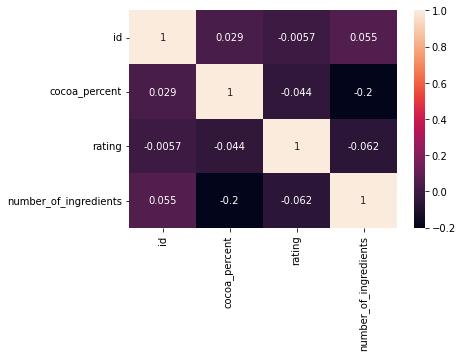

In [125]:
corr = coco_df1.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)
sns.heatmap(corr, annot=True)
plt.rcParams["figure.figsize"]=(2,1)
plt.show()


In [ ]:
cat_dep=[]
cat_indep = []
for name in cat:
    crt=pd.crosstab(coco_cdf['rating'],coco_cdf[name])
    stat, p, dof, expected = chi2_contingency(crt)
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    if abs(stat) >= critical:
        cat_dep.append('{} : Dependent'.format(name))
    else:
        cat_dep.append('{} : Independent'.format(name))
        cat_indep.append(name)
cat_dep

['company_location : Dependent',
 'country_of_bean_origin : Dependent',
 'sweet : Dependent',
 'nutty : Dependent',
 'cocoa : Dependent',
 'roasty : Independent',
 'earthy : Dependent',
 'creamy : Dependent',
 'sandy : Dependent',
 'fatty : Dependent',
 'floral : Independent',
 'intense : Independent',
 'spicy : Independent',
 'sour : Dependent',
 'vanilla : Dependent',
 'fruit : Dependent',
 'molasses : Dependent',
 'woody : Independent',
 'sticky : Independent',
 'coffee : Independent',
 'rich : Dependent',
 'dried.fruit : Dependent',
 'ingredient_Beans : Dependent',
 'ingredient_Sugar : Dependent',
 'ingredient_Sweetener : Independent',
 'ingredient_Cocoa_Butter : Independent',
 'ingredient_vanilla : Dependent',
 'ingredient_lecithin : Dependent',
 'ingredient_salt : Independent',
 'n : Dependent']